<a href="https://colab.research.google.com/github/SonalGire/Agentic_AI/blob/main/chatbot_using_Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.3/387.3 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.4.31
    Uninstalling langsmith-0.4.31:
      Successfully uninstalled langsmith-0.4.31


In [4]:
!pip install langchain-google-genai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.7.0 which is incompatible.


In [17]:
import os

os.environ["GOOGLE_API_KEY"] = "AIzaSP8M"

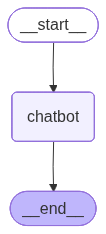

User:hey
Assistant: Hey there! How can I help you today? 😊
User:tell me 3 important things that we should learn in AI field .
Assistant: The field of AI is vast and rapidly evolving, but here are three crucial areas that are essential to learn for anyone looking to understand, contribute to, or navigate this transformative technology:

1.  **Foundational Machine Learning Concepts and Algorithms:** This is the bedrock of modern AI. You need to understand the core principles behind how machines learn from data. This includes:
    *   **Supervised Learning:** How algorithms learn from labeled data (e.g., classification, regression). Key algorithms like linear regression, logistic regression, decision trees, support vector machines (SVMs), and the basics of neural networks are fundamental.
    *   **Unsupervised Learning:** How algorithms find patterns in unlabeled data (e.g., clustering, dimensionality reduction). Understanding algorithms like k-means, principal component analysis (PCA), 

In [18]:
from langgraph.graph import StateGraph, START, END
from typing import List,Dict
from langchain_google_genai import ChatGoogleGenerativeAI


# Create a StateGraph
class State(Dict):
    messages : List[Dict[str, str]]


graph_builder = StateGraph(State)

# Initialize the LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite",
                             temperature=0.3,
                             google_api_key=os.environ["GOOGLE_API_KEY"])


def chatbot(state: State):
    response = llm.invoke(state["messages"])
    state["messages"].append({"role": "assistant", "content": response.content})
    return {"messages": state["messages"]}


# Add a node
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START , "chatbot")
graph_builder.add_edge("chatbot",END)


# Compile the graph
graph = graph_builder.compile()


# Visualize the graph(optional)
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


def graph_stream(user_input : str):
    state = {"messages": [{"role": "user", "content": user_input}]}
    for event in graph.stream(state):
        for value in event.values():
            # Access and print only the content of the assistant's message
            print("Assistant:", value["messages"][-1]["content"])



# Run chatbot in a loop
if __name__ == "__main__":
    while True:
        try:
            user_input = input("User:")
            if user_input.lower() in ["quit","exit","q"]:
                print("Goodbye!!")
                print("="*50)
                break
            graph_stream(user_input)
        except Exception as e:
            print(f"An error occurred: {e}")
            break